<a href="https://colab.research.google.com/github/YasasTL/Vehicle-Price-Prediction/blob/main/Vehicle_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.losses import MeanAbsoluteError

In [ ]:
# os.chdir('/content/drive/MyDrive/')

In [ ]:
data=pd.read_excel("/content/drive/MyDrive/Book5000.xlsx")

In [ ]:
data.shape

(50000, 19)

In [ ]:
data.head(3)

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Honda Vezel Limited 2017 for sale,"Posted on 01 Sep 2:45 pm, Kurunegala City, Kur...","Rs 12,900,000",Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500 cc","37,000 km","Kurunegala City, Kurunegala",HONDA VEZEL LIMITEDCBE-XXXXMANU YEAR : 2017LIM...,https://ikman.lk/en/ad/honda-vezel-limited-201...,Prasad Enterprises,Premium-Member,2022-09-01 14:45:00
1,Jaguar XF Fully Loaded 2013 for sale,"Posted on 28 Sep 10:23 am, Kurunegala City, Ku...","Rs 16,250,000",Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,"2,200 cc","42,000 km","Kurunegala City, Kurunegala",1st owner(registered owner)Diesel(13-14km per ...,https://ikman.lk/en/ad/jaguar-xf-fully-loaded-...,Dhanushka Dharmasri,Member,2022-09-28 10:23:00
2,Toyota CHR GT New Face 2wd 2020 for sale,"Posted on 16 Sep 1:16 pm, Colombo 7, Colombo","Rs 17,000,000",Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","15,000 km","Colombo 7, Colombo",2020 Facelift modelFirst owner (No previous ow...,https://ikman.lk/en/ad/toyota-chr-gt-new-face-...,Carzone Lanka,Member,2022-09-16 13:16:00


In [ ]:
print(data.columns)


Index(['Title', 'Sub_title', 'Price', 'Brand', 'Model', 'Edition', 'Year',
       'Condition', 'Transmission', 'Body', 'Fuel', 'Capacity', 'Mileage',
       'Location', 'Description', 'Post_URL', 'Seller_name', 'Seller_type',
       'published_date'],
      dtype='object')


In [ ]:
data=data.drop(columns=['Title','Sub_title','Edition','Transmission','Body','Fuel','Capacity','Mileage','Location','Description','Post_URL','Seller_name','Seller_type','published_date'])

In [ ]:
data.head(5)

,Price,Brand,Model,Year,Condition
0,"Rs 12,900,000",Honda,Vezel,2017,Used
1,"Rs 16,250,000",Jaguar,XF,2013,Used
2,"Rs 17,000,000",Toyota,CHR,2020,Used
3,"Rs 13,000,000",Toyota,CHR,2017,Used
4,"Rs 33,500,000",Toyota,Land Cruiser Prado,2015,Used


In [ ]:
df = pd.DataFrame(data)

df['Price'] = df['Price'].str.replace(r'\D', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

print(df)

          Price   Brand               Model  Year Condition
0      12900000   Honda               Vezel  2017      Used
1      16250000  Jaguar                  XF  2013      Used
2      17000000  Toyota                 CHR  2020      Used
3      13000000  Toyota                 CHR  2017      Used
4      33500000  Toyota  Land Cruiser Prado  2015      Used
...         ...     ...                 ...   ...       ...
49995   6995000  Toyota                Vitz  2016      Used
49996   5590000  Toyota                Aqua  2012      Used
49997   6885000  Toyota               Prius  2013      Used
49998  42500000  Toyota  Land Cruiser Prado  2017      Used
49999  18100000     BMW                  X3  2012      Used

[50000 rows x 5 columns]


In [ ]:
data.shape

(50000, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      50000 non-null  int64 
 1   Brand      50000 non-null  object
 2   Model      50000 non-null  object
 3   Year       50000 non-null  int64 
 4   Condition  50000 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
data['Brand'].value_counts()

Toyota           16056
Suzuki            7650
Honda             4573
Nissan            4258
Mitsubishi        3261
Mercedes Benz     1790
BMW               1613
Micro             1078
Land Rover         992
Audi               857
Hyundai            801
Daihatsu           797
Kia                795
Mazda              755
Tata               496
Perodua            429
Maruti Suzuki      394
Peugeot            392
Ford               327
DFSK               224
MG                 206
Volkswagen         182
Renault            180
Isuzu              130
Ssang Yong         128
Mini               111
Mahindra           107
Morris             106
Jaguar             103
Datsun             103
Other brand        102
Subaru              95
Chevrolet           92
Chery               88
Austin              80
Zotye               77
Porsche             68
Jeep                66
Proton              64
Lexus               62
Fiat                55
Volvo               51
Chrysler            36
Daewoo     

In [ ]:
data['Model'].value_counts()

Vitz       2035
Alto       1957
Axio       1532
Sunny      1508
Premio     1434
           ... 
Viva          1
Spike         1
Forfour       1
Espero        1
CLA 250       1
Name: Model, Length: 571, dtype: int64

In [ ]:
data['Condition'].value_counts()

Used             48220
Reconditioned     1258
New                522
Name: Condition, dtype: int64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Convert relevant columns to strings
data['Brand'] = data['Brand'].astype(str)
data['Model'] = data['Model'].astype(str)
data['Condition'] = data['Condition'].astype(str)
data['Year'] = data['Year'].astype(str)

In [ ]:
X = data.drop('Price', axis=1)
y = data['Price']
print(y)

0        12900000
1        16250000
2        17000000
3        13000000
4        33500000
           ...   
49995     6995000
49996     5590000
49997     6885000
49998    42500000
49999    18100000
Name: Price, Length: 50000, dtype: int64


In [ ]:
print(X)

        Brand               Model  Year Condition
0       Honda               Vezel  2017      Used
1      Jaguar                  XF  2013      Used
2      Toyota                 CHR  2020      Used
3      Toyota                 CHR  2017      Used
4      Toyota  Land Cruiser Prado  2015      Used
...       ...                 ...   ...       ...
49995  Toyota                Vitz  2016      Used
49996  Toyota                Aqua  2012      Used
49997  Toyota               Prius  2013      Used
49998  Toyota  Land Cruiser Prado  2017      Used
49999     BMW                  X3  2012      Used

[50000 rows x 4 columns]


In [ ]:
X.shape , y.shape

((50000, 4), (50000,))

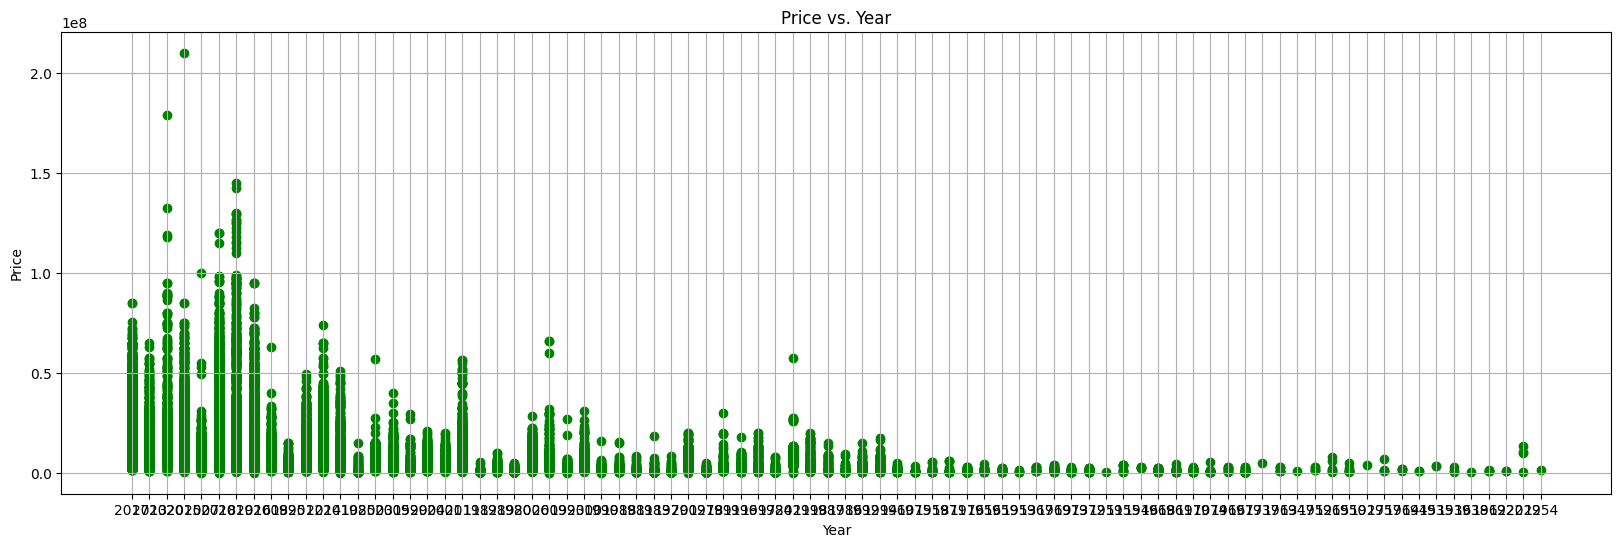

In [ ]:
plt.figure(figsize=(20, 6))
plt.scatter(data['Year'], data['Price'], alpha=1,c='g')
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [ ]:
# Define the categorical features to be one-hot encoded
cat_features = ['Brand', 'Model', 'Year', 'Condition']
# Create the column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), cat_features)],
    remainder='passthrough')

In [ ]:
# Apply the column transformer to the features
x = preprocessor.fit_transform(X)
print(x)

  (0, 17)	1.0
  (0, 573)	1.0
  (0, 707)	1.0
  (0, 715)	1.0
  (1, 21)	1.0
  (1, 608)	1.0
  (1, 703)	1.0
  (1, 715)	1.0
  (2, 55)	1.0
  (2, 191)	1.0
  (2, 710)	1.0
  (2, 715)	1.0
  (3, 55)	1.0
  (3, 191)	1.0
  (3, 707)	1.0
  (3, 715)	1.0
  (4, 55)	1.0
  (4, 370)	1.0
  (4, 705)	1.0
  (4, 715)	1.0
  (5, 55)	1.0
  (5, 370)	1.0
  (5, 697)	1.0
  (5, 715)	1.0
  (6, 17)	1.0
  :	:
  (49993, 715)	1.0
  (49994, 17)	1.0
  (49994, 573)	1.0
  (49994, 704)	1.0
  (49994, 715)	1.0
  (49995, 55)	1.0
  (49995, 576)	1.0
  (49995, 706)	1.0
  (49995, 715)	1.0
  (49996, 55)	1.0
  (49996, 152)	1.0
  (49996, 702)	1.0
  (49996, 715)	1.0
  (49997, 55)	1.0
  (49997, 453)	1.0
  (49997, 703)	1.0
  (49997, 715)	1.0
  (49998, 55)	1.0
  (49998, 370)	1.0
  (49998, 707)	1.0
  (49998, 715)	1.0
  (49999, 4)	1.0
  (49999, 599)	1.0
  (49999, 702)	1.0
  (49999, 715)	1.0


In [ ]:
# Access the transformers_ attribute to see the details of the transformation
transformers = preprocessor.transformers_

# Find the index of the 'Year' feature in the transformed columns
for name, transformer, features in transformers:
    if 'Year' in features:
        year_column_index = features.index('Year')
        break

print("Index of 'Year' column:", year_column_index)

Index of 'Year' column: 2


In [ ]:
y.shape

(50000,)

In [ ]:
x.shape

(50000, 716)

In [ ]:
data.shape

(50000, 5)

In [ ]:
data.head(5)

,Price,Brand,Model,Year,Condition
0,12900000,Honda,Vezel,2017,Used
1,16250000,Jaguar,XF,2013,Used
2,17000000,Toyota,CHR,2020,Used
3,13000000,Toyota,CHR,2017,Used
4,33500000,Toyota,Land Cruiser Prado,2015,Used


In [ ]:
price_df = pd.DataFrame(data['Price'])
print(price_df)

          Price
0      12900000
1      16250000
2      17000000
3      13000000
4      33500000
...         ...
49995   6995000
49996   5590000
49997   6885000
49998  42500000
49999  18100000

[50000 rows x 1 columns]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.15)

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("x_train_year shape:", x_train[2].shape)

x_train shape: (42500, 716)
y_train shape: (42500,)
x_test shape: (7500, 716)
y_test shape: (7500,)
x_train_year shape: (1, 716)


In [ ]:
# Convert y_train Series to a NumPy array and reshape it
y_train_reshaped = y_train.values.reshape(-1, 1)
# Convert y_test Series to a NumPy array and reshape it
y_test_reshaped = y_test.values.reshape(-1, 1)

In [ ]:
print(y_train)
type(y_train)

29396     2450000
12060      900000
26412      410000
18901    12400000
30868     5575000
           ...   
10495     4450000
503      70500000
30416     7590000
15257    23850000
27143     2850000
Name: Price, Length: 42500, dtype: int64


pandas.core.series.Series

In [ ]:
x_train.shape,x_test.shape

((42500, 716), (7500, 716))

In [ ]:
x_train.shape[1]

716

# Model building

Epoch 1/10
1329/1329 [==============================] - 20s 13ms/step - loss: 2657542.7500 - mse: 40946657918976.0000
Epoch 2/10
1329/1329 [==============================] - 16s 12ms/step - loss: 1630365.6250 - mse: 14558172282880.0000
Epoch 3/10
1329/1329 [==============================] - 18s 14ms/step - loss: 1563618.5000 - mse: 13438401118208.0000
Epoch 4/10
1329/1329 [==============================] - 17s 12ms/step - loss: 1537594.0000 - mse: 12862691999744.0000
Epoch 5/10
1329/1329 [==============================] - 18s 13ms/step - loss: 1505451.5000 - mse: 12465766137856.0000
Epoch 6/10
1329/1329 [==============================] - 17s 13ms/step - loss: 1497744.7500 - mse: 12317829890048.0000
Epoch 7/10
1329/1329 [==============================] - 18s 14ms/step - loss: 1476177.6250 - mse: 12046758313984.0000
Epoch 8/10
1329/1329 [==============================] - 17s 13ms/step - loss: 1473680.8750 - mse: 11990781132800.0000
Epoch 9/10
1329/1329 [==============================] - 

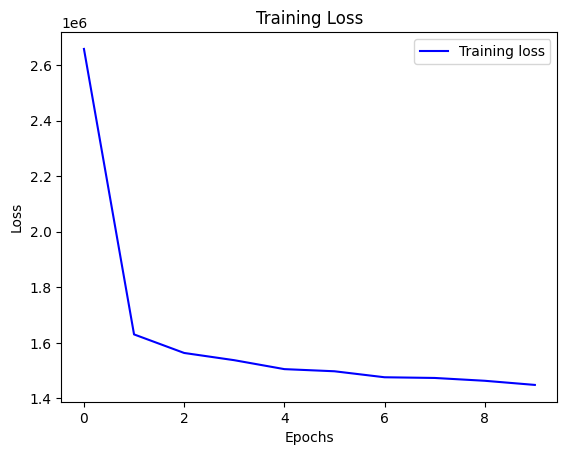

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(150, activation='relu'))
model.add(tf.keras.layers.Dense(96, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='relu'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.05), loss='mean_absolute_error', metrics=['mse'])

x_train_dense = x_train.toarray()
history = model.fit(x_train_dense, y_train, epochs=10, batch_size=32)

# Plot the error variation with respect to epochs
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               367104    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 200)               51400     
                                                                 
 dense_3 (Dense)             (None, 150)               30150     
                                                                 
 dense_4 (Dense)             (None, 96)                14496     
                                                                 
 dense_5 (Dense)             (None, 64)                6208      
                                                                 
 dense_6 (Dense)             (None, 32)                2

In [ ]:
from sklearn.metrics import r2_score

# Assuming you have already trained and obtained predictions from your neural network model
predicted_values1 = model.predict(x_train)
predicted_values2 = model.predict(x_test)

# Calculate R-squared
r2_train = r2_score(y_train, predicted_values1)
r2_test = r2_score(y_test, predicted_values2)

# Print the R-squared score
print("train Score:", r2_train*100)
print("test Score:", r2_test*100)

235/235 [==============================] - 1s 3ms/step
train Score: 90.5501288849235
test Score: 89.31724910874681


In [ ]:
# Get weights and biases for all layers in the model
all_weights_and_biases = [layer.get_weights() for layer in model.layers]

# Iterate through each layer's weights and biases
for layer_num, (weights, biases) in enumerate(all_weights_and_biases):
    sublist1_length = len(weights)
    sublist2_length = len(biases)

    print(f"Layer {layer_num + 1} - Sublist 1 Length: {sublist1_length}, Sublist 2 Length: {sublist2_length}")
    print("Sublist 1 (weights):")
    print(weights)
    print("Sublist 2 (biases):")
    print(biases)
    print("=" * 80)

Layer 1 - Sublist 1 Length: 716, Sublist 2 Length: 512
Sublist 1 (weights):
[[ 0.12008624 -0.01730638  0.07657811 ...  0.02977279 -0.04392481
  -0.01202162]
 [ 0.02090544  0.10768955 -0.01715016 ...  0.0735102   0.09979893
  -0.0504818 ]
 [ 0.09094764  0.07650696  0.06566974 ...  0.14193264  0.09302163
   0.19254   ]
 ...
 [-0.1219835  -0.24047802 -0.00304152 ... -0.02490956 -0.03034797
  -0.00942583]
 [ 0.1400862   0.10054217 -0.03593579 ... -0.05102877 -0.20043746
  -0.17785236]
 [ 0.06157759  0.02744227  0.0109843  ... -0.21470813 -0.14052576
  -0.11833952]]
Sublist 2 (biases):
[ 2.71194032e-03 -8.53787293e-04 -3.27883312e-03 -1.46029726e-01
  2.76045930e-02  1.58915892e-02 -6.65268525e-02 -8.81384835e-02
  7.94987008e-03 -8.57875720e-02  2.07572691e-02 -1.33661851e-01
 -1.76438347e-01 -1.21545389e-01 -5.89630976e-02 -1.17862172e-01
 -5.49572073e-02  2.29839943e-02 -1.29229888e-01  7.01006874e-02
 -8.82962495e-02 -4.91704866e-02 -1.13873333e-01  5.67273572e-02
 -1.47388697e-01 -4.12

In [ ]:
num_neurons_layer_1 = model.layers[0].weights[0].shape[1]  # Assuming model is your neural network model
print(num_neurons_layer_1)


512


# Lime

In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=52100726fd4dd899f57ff7f4426e41d7cb688a2a06f9d0c4a05deab058823b78
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

x_test_dense = x_test.toarray()

# Create a LIME explainer
explainer = LimeTabularExplainer(x_train_dense, mode='regression')

# Choose a specific instance for analysis
instance_to_explain = x_test_dense[0]

# Generate LIME explanation
explanation = explainer.explain_instance(instance_to_explain, model.predict)

# Print feature importance
print("LIME Feature Importance:")
for feature, importance in explanation.as_list():
    print(f"{feature}: {importance}")


157/157 [==============================] - 1s 7ms/step
LIME Feature Importance:
371 <= 0.00: -27893258.654797997
444 <= 0.00: -23434091.196559425
43 <= 0.00: -22119024.031996153
46 <= 0.00: -18733465.05037524
494 <= 0.00: -16915427.462897804
113 <= 0.00: -16551603.485525962
370 <= 0.00: -13813242.948368035
330 <= 0.00: -13530360.4223492
498 <= 0.00: -12841625.623146
18 <= 0.00: -7797892.193344115


157/157 [==============================] - 1s 8ms/step


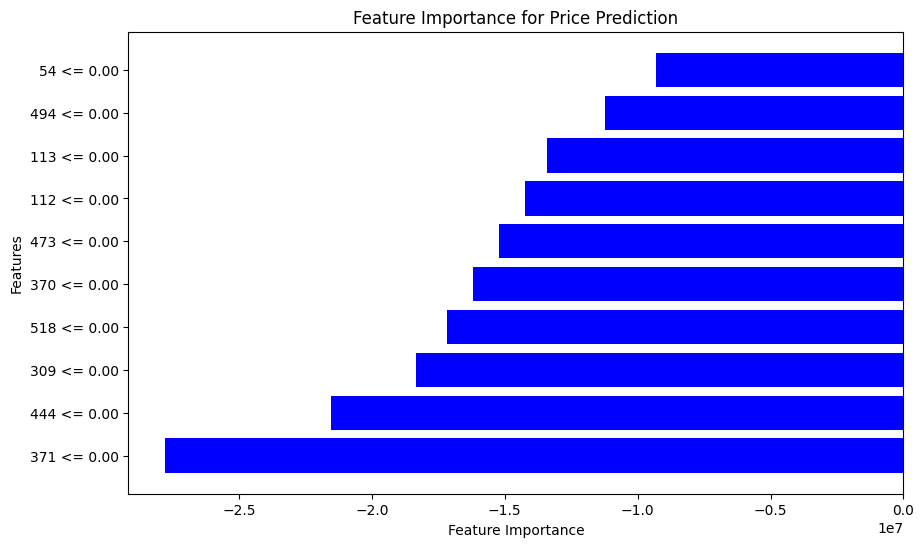

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Create a LIME explainer for tabular data
explainer = LimeTabularExplainer(x_train_dense, mode="regression")

# Select an instance for explanation (replace with an actual instance)
instance_idx = 0
instance_to_explain = x_train_dense[instance_idx]

# Generate an explanation for the instance
explanation = explainer.explain_instance(instance_to_explain, model.predict, num_features=10)

# Get feature importance values
feature_importance = explanation.as_list()

# Separate features and importance values
features, importance_values = zip(*feature_importance)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importance_values, color="blue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Price Prediction")
plt.show()


In [ ]:
# Get the transformed feature names from the ColumnTransformer
transformed_feature_names = preprocessor.get_feature_names_out()

# Create a dictionary to map transformed indices to feature names
transformed_to_original_mapping = {}
for idx, feature_name in enumerate(transformed_feature_names):
    transformed_to_original_mapping[idx] = feature_name

# List of index numbers and their corresponding importance values
index_importance_pairs = [
    (371, -32868665.225154236),
    (498, -26805590.600108985),
    (444, -25402598.036269557),
    (18, -21619192.97852865),
    (94, -19431900.407977663),
    (370, -18856988.163314193),
    (118, -17327549.734043565),
    (499, -16107624.992196282),
    (494, -12020293.268192966),
    (475, -7918932.1969574345)
]

# Print relevant feature names for the given index numbers
for idx, importance in index_importance_pairs:
    if idx in transformed_to_original_mapping:
        print(f"{idx} ({transformed_to_original_mapping[idx]}): {importance}")
    else:
        print(f"Index {idx} not found in transformed feature names.")


371 (encoder__Model_Land Cruiser Sahara): -32868665.225154236
498 (encoder__Model_S400): -26805590.600108985
444 (encoder__Model_Patrol): -25402598.036269557
18 (encoder__Brand_Hummer): -21619192.97852865
94 (encoder__Model_4Runner): -19431900.407977663
370 (encoder__Model_Land Cruiser Prado): -18856988.163314193
118 (encoder__Model_740Le): -17327549.734043565
499 (encoder__Model_S500): -16107624.992196282
494 (encoder__Model_S300): -12020293.268192966
475 (encoder__Model_Range Rover PHEV): -7918932.1969574345


# shap

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 2.9 MB/s eta 0:00:00


In [ ]:
x_test_dense = x_test.toarray()  # Convert SparseTensor to dense array
loss = model.evaluate(x_test_dense, y_test)
print('MSE:', loss)

# MSE: [200,131,265,691,648.0, 0.0] in 20
# MSE: [32,581,542,215,680.0, 0.0] in 15
# MSE: [39652052434944.0, 0.0] in 12
# MSE: [32,908,305,760,256.0, 0.0] in 10 epochs
# MSE: [52,614,662,193,152.0, 0.0] in 5

235/235 [==============================] - 4s 11ms/step - loss: 1589174.2500 - mse: 12340504297472.0000
MSE: [1589174.25, 12340504297472.0]


In [ ]:
y_train_pred=model.predict(x_train)
y_train_pred

1329/1329 [==============================] - 8s 6ms/step


array([[ 1654824.1],
       [  725687.6],
       [  641705.6],
       ...,
       [10355286. ],
       [34346596. ],
       [ 3176980.8]], dtype=float32)

In [ ]:
y_test_pred=model.predict(x_test)

235/235 [==============================] - 1s 3ms/step


In [ ]:
from scipy.stats import norm

In [ ]:
y_std = price_df.std()
y_mean = price_df.mean()
prediction_probability = norm.cdf(y_train_pred, loc=y_mean, scale=y_std)
print(prediction_probability)

[[0.25058403]
 [0.22439529]
 [0.22210723]
 ...
 [0.54824468]
 [0.98956518]
 [0.2967529 ]]


In [ ]:
print(y_std)
print(y_mean)

Price    1.095941e+07
dtype: float64
Price    9.026702e+06
dtype: float64


In [ ]:
y_std = 10908531.416802594
%store y_std
y_mean = 9020809.212917646
%store y_mean

Stored 'y_std' (float)
Stored 'y_mean' (float)


In [ ]:
y_train.shape

(42500,)

In [ ]:
y_train_pred.shape

(42500, 1)

In [ ]:
y_train_pred = y_train_pred.reshape(-1)

In [ ]:
y_train_pred.shape

(42500,)

In [ ]:
import pandas as pd

df_predict_train = pd.DataFrame({'actual price': y_train, 'pred_train': y_train_pred})
df_predict_train

,actual price,pred_train
29396,2450000,1.654824e+06
12060,900000,7.256876e+05
26412,410000,6.417056e+05
18901,12400000,1.056469e+07
30868,5575000,5.293581e+06
...,...,...
10495,4450000,4.016474e+06
503,70500000,7.264884e+07
30416,7590000,1.035529e+07
15257,23850000,3.434660e+07


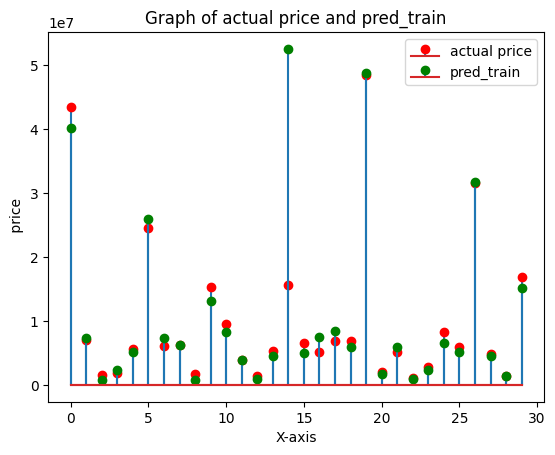

In [ ]:
random_df = df_predict_train.sample(n=30)
plt.stem(random_df['actual price'], label='actual price', markerfmt='ro')
plt.stem(random_df['pred_train'], label='pred_train',markerfmt='go')

plt.xlabel('X-axis')
plt.ylabel(' price')
plt.title('Graph of actual price and pred_train')

plt.legend()
plt.show()

In [ ]:
y_test_pred = y_test_pred.reshape(-1)

df_predict_test=pd.DataFrame({'actual price':y_test,'pred_test':y_test_pred})
df_predict_test

,actual price,pred_test
46346,18750000,1.468157e+07
38596,95000000,7.284848e+07
15589,11690000,1.560673e+07
18539,61500000,8.105112e+07
33543,840000,6.417056e+05
...,...,...
14844,4500000,5.194662e+06
4442,6400000,4.825541e+06
17827,725000,6.595387e+05
33284,6700000,6.474226e+06


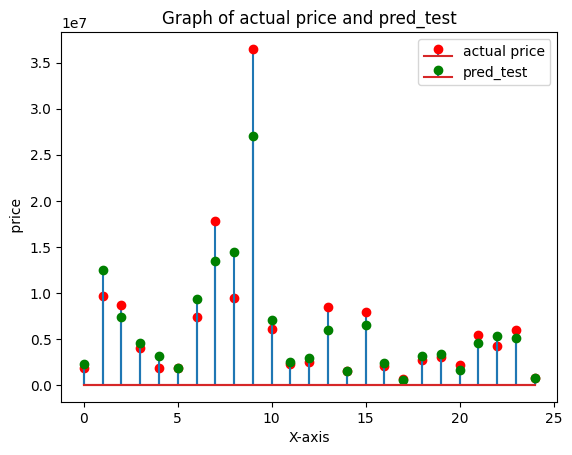

In [ ]:
random_df = df_predict_test.sample(n=25)
plt.stem(random_df['actual price'], label='actual price', markerfmt='ro')
plt.stem(random_df['pred_test'], label='pred_test', markerfmt='go')

plt.xlabel('X-axis')
plt.ylabel(' price')
plt.title('Graph of actual price and pred_test')

plt.legend()
plt.show()
# stem

# Save

In [ ]:
tf.saved_model.save(model, 'mlpkl')  #to save the tensorflow model

In [ ]:
!pwd


/content


In [ ]:
# Get the column names from the column transformer
encoder_columns = preprocessor.named_transformers_['encoder'].get_feature_names_out(cat_features)
encoder_columns = list(encoder_columns)

# Add the remaining columns to the encoder columns (if any)
if len(preprocessor.transformers_) > 1:
    remainder_columns = list(preprocessor.transformers_[1][2])
    encoder_columns.extend(remainder_columns)


In [ ]:
import pickle

In [ ]:
# Save the encoder_columns as a pickle file
with open('encoder_columns.pickle', 'wb') as f:
    pickle.dump(encoder_columns, f)

In [ ]:
import json

In [ ]:
with open('new_preprocessor.json', 'w') as f:  #new_preprocessor save as json
    json.dump(encoder_columns, f)

In [ ]:
imported = tf. saved_model. load('mlpkl')  # to load the model

In [ ]:
import joblib

In [ ]:
# Create a custom encoder function to handle the OneHotEncoder object
def custom_encoder(obj):
    if isinstance(obj, ColumnTransformer):                              #preprocessor saved as json
        transformers = []
        for transformer in obj.transformers_:
            if isinstance(transformer[1], OneHotEncoder):
                categories = transformer[1].categories_
                categories_list = [list(cat) for cat in categories]
                transformers.append((transformer[0], categories_list, transformer[1]))
        return {
            "_sklearn_object_type": "ColumnTransformer",
            "transformers": transformers,
        }
    return None

preprocessor_dict = preprocessor.__dict__

preprocessor_json = json.dumps(preprocessor_dict, default=custom_encoder)

with open('preprocessor.json', 'w') as json_file:
    json_file.write(preprocessor_json)

In [ ]:
# !pip install tensorflowjs


In [ ]:
# import tensorflowjs as tfjs

In [ ]:
# tfjs.converters.save_keras_model(model,'models')  # model converts tensorflow to json